In [244]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [245]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [246]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [247]:
%matplotlib inline

In [248]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [249]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [250]:
# Files to use 
filenamePrice='Own_Factor_AdjustedPriceForward-1d.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [251]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    # 换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJILLIQ = 'Own_Factor_ADJ_ILLQ_1D.csv' # 非流动性(市值调整) 
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 2012-2016 Cum return 1.8(group0), -0.3(group9) monotonicity: perfect
filenameTOVD20 = 'Own_Factor_Turnover_Volatility_deviation_20D.csv' # 20天换手率均值除500天换手率均值-1
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)  Cum return 0.7(group0), -0.2(group9)Good

In [252]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameADJDDA20 ='Own_Factor_ADJ_DDA_20D.csv' # 中性化（仅去市值）后的DDA20
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #



In [253]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'

In [254]:
# Constants
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [319]:
#
sololist = [filenameADJTOV20]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [320]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [321]:
induExplanation

,LZ_GPA_TMP_INDU_ZX-t
0,石油石化
1,煤炭
2,有色金属
3,电力及公用事业
4,钢铁
5,基础化工
6,建筑
7,建材
8,轻工制造
9,机械


In [322]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [323]:
stDF.head()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,603787.SH,603320.SH,002868.SZ,300647.SZ,300650.SZ,603505.SH,603501.SH,300643.SZ,300649.SZ,603985.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
## easy way to calculate the last day of the month
stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
stDF.groupby(['label'])

In [325]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [326]:
LFCAPDF = np.log10(ff.getData(filenameFCAP, thresholdNum, startTime, endTime))

In [327]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [328]:
# calculate correlation between two factors
factor1 = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(factor1,LFCAPDF, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,86.000000,86.000000
mean,0.157647,0.317215
std,0.105794,0.122183
min,-0.003811,0.045571
25%,0.119134,0.248081
50%,0.158724,0.325088
75%,0.216921,0.409676
max,0.419021,0.581000


In [329]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [330]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [331]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 297
2010-02-26 00:00:00 332
2010-03-31 00:00:00 341
2010-04-30 00:00:00 343
2010-05-31 00:00:00 349
2010-06-30 00:00:00 347
2010-07-30 00:00:00 332
2010-08-31 00:00:00 324
2010-09-30 00:00:00 323
2010-10-29 00:00:00 327
2010-11-30 00:00:00 330
2010-12-31 00:00:00 339
2011-01-31 00:00:00 349
2011-02-28 00:00:00 375
2011-03-31 00:00:00 373
2011-04-29 00:00:00 376
2011-05-31 00:00:00 337
2011-06-30 00:00:00 361
2011-07-29 00:00:00 329
2011-08-31 00:00:00 322
2011-09-30 00:00:00 319
2011-10-31 00:00:00 299
2011-11-30 00:00:00 308
2011-12-30 00:00:00 311
2012-01-31 00:00:00 292
2012-02-29 00:00:00 288
2012-03-30 00:00:00 328
2012-04-27 00:00:00 376
2012-05-31 00:00:00 316
2012-06-29 00:00:00 322
2012-07-31 00:00:00 262
2012-08-31 00:00:00 244
2012-09-28 00:00:00 229
2012-10-31 00:00:00 208
2012-11-30 00:00:00 202
2012-12-31 00:00:00 192
2013-01-31 00:00:00 186
2013-02-28 00:00:00 186
2013-03-29 00:00:00 194
2013-04-26 00:00:00 188
2013-05-31 00:00:00 182
2013-06-28 00:00

In [332]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(sololist[0], thresholdNum, startTime, endTime)

for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,groupNum=10,Mean_Num=1)

In [333]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
sizeDistribution = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
        sizeDistribution.loc[time][group] = LFCAPDF.loc[time][totalGroupDict[time][group]].quantile()
ReturnDF.sort_index(axis=1,inplace=True)
sizeDistribution.sort_index(axis=1,inplace=True)

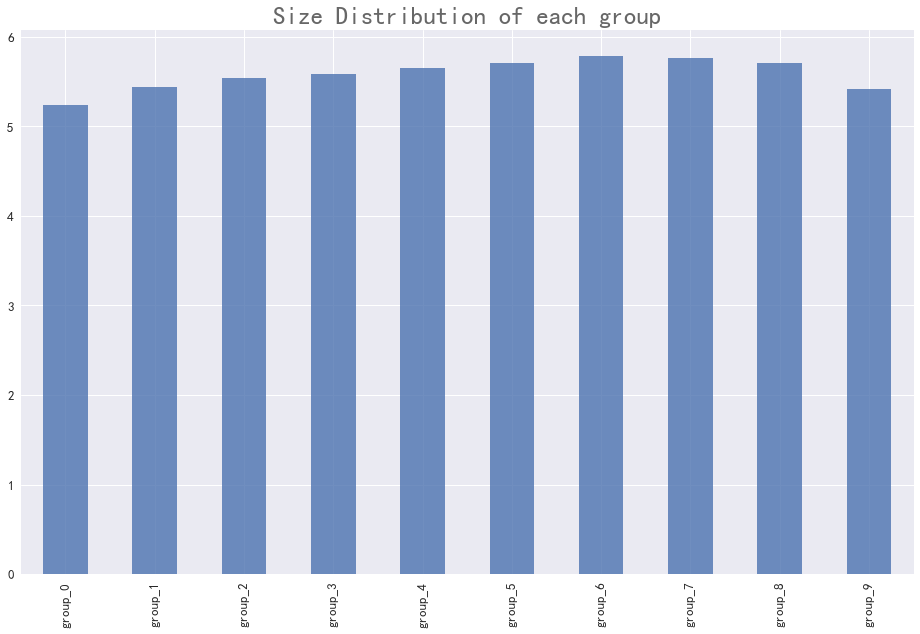

In [334]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
sizeDistribution.quantile().plot(kind='bar',ax = ax, fontsize =13,title ='Size Distribution of each group',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [335]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = ReturnDF.columns, data=range(len(ReturnDF.columns)))
monoDF = pd.DataFrame(index = ReturnDF.index, columns=['Spearman_Cor'], dtype = float)
for date in ReturnDF.index:
    monoDF.loc[date] = ReturnDF.loc[date].corr(referSeries,method='spearman')   

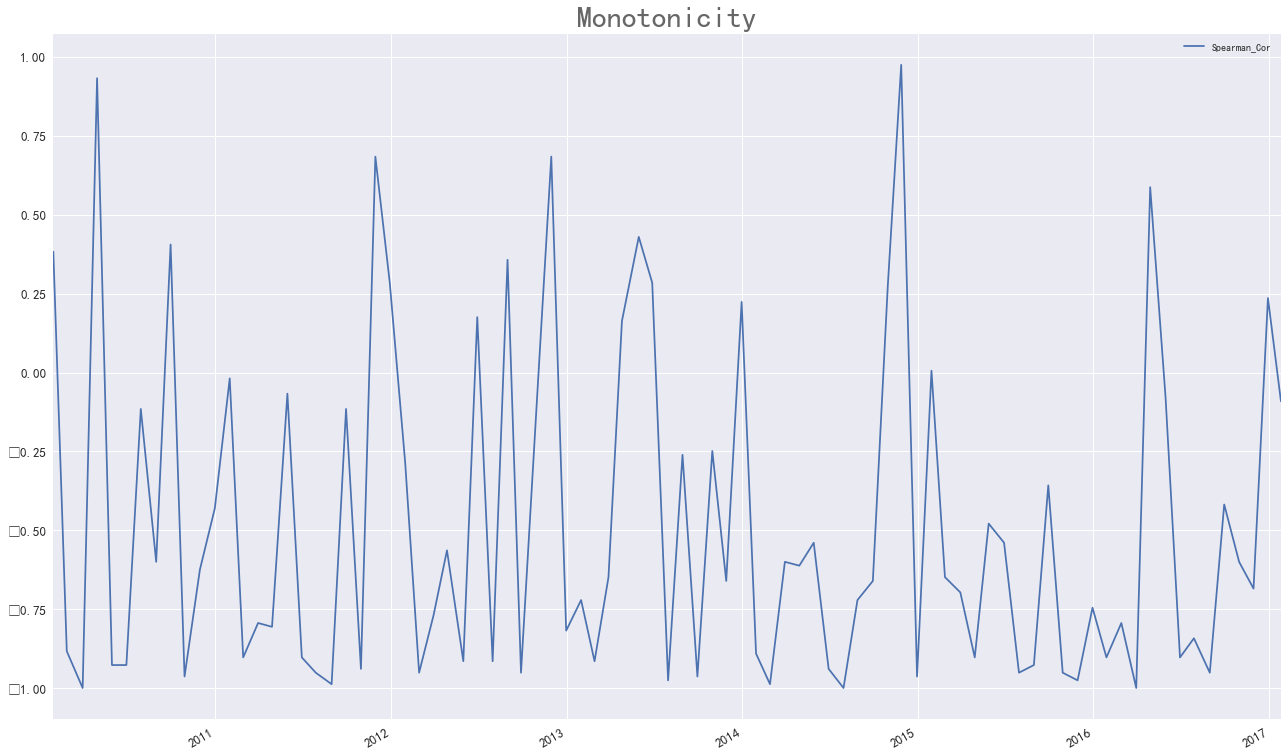

In [336]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [337]:
shapeRatio = ReturnDF.mean()/ReturnDF.std()
shapeRatio

group_0    0.766064
group_1    0.644878
group_2    0.513635
group_3    0.482192
group_4    0.392682
group_5    0.312120
group_6    0.182443
group_7    0.032584
group_8   -0.082824
group_9   -0.082860
dtype: float64

In [338]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [339]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [340]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

11.569996422604806

In [341]:
# long top group short bot group 
sortGroups = ReturnDF.cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
ReturnDF['top_bot_comb'] = ReturnDF[top] - ReturnDF[bot]

In [342]:
ReturnDF.cumsum().tail()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,top_bot_comb
2016-09-30,2.114944,1.418993,0.942592,0.773501,0.572025,0.442888,0.228526,0.027400,-0.220953,-0.491905,2.544973
2016-10-31,2.136175,1.438072,0.954346,0.771509,0.568666,0.447922,0.227651,0.036102,-0.210356,-0.502332,2.576631
2016-11-30,2.164889,1.452979,0.976681,0.790572,0.573927,0.441838,0.228684,0.042214,-0.214033,-0.496940,2.599953
2016-12-30,2.141741,1.441354,0.975682,0.786016,0.558069,0.435859,0.228403,0.040719,-0.206858,-0.531446,2.611310
2017-01-26,2.146648,1.445150,0.974880,0.792749,0.564650,0.435263,0.238828,0.047884,-0.206785,-0.539321,2.624092


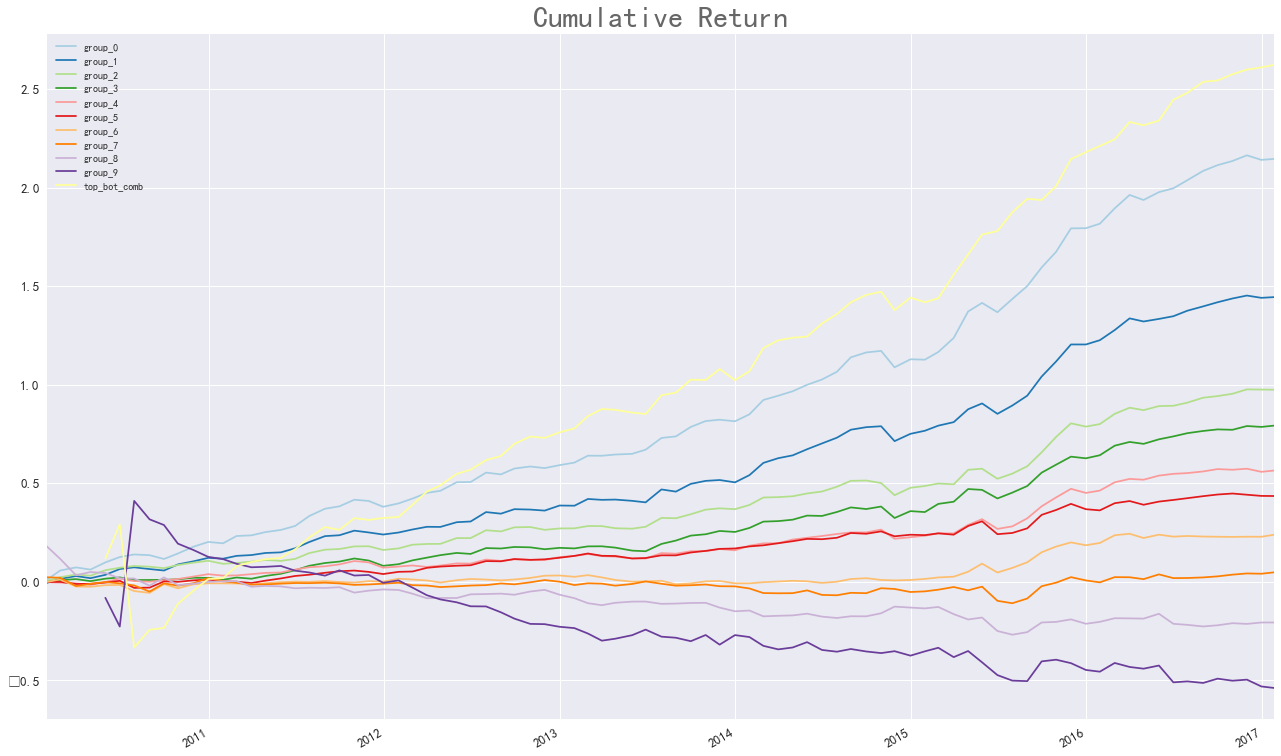

In [343]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",11),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [344]:
d =pd.DataFrame(index=[0],columns = ['d','e','f','g','j'],data=np.array([[1,3,1,2,1]]))
d[d==1].dropna(axis=1).columns

Index([u'd', u'f', u'j'], dtype='object')

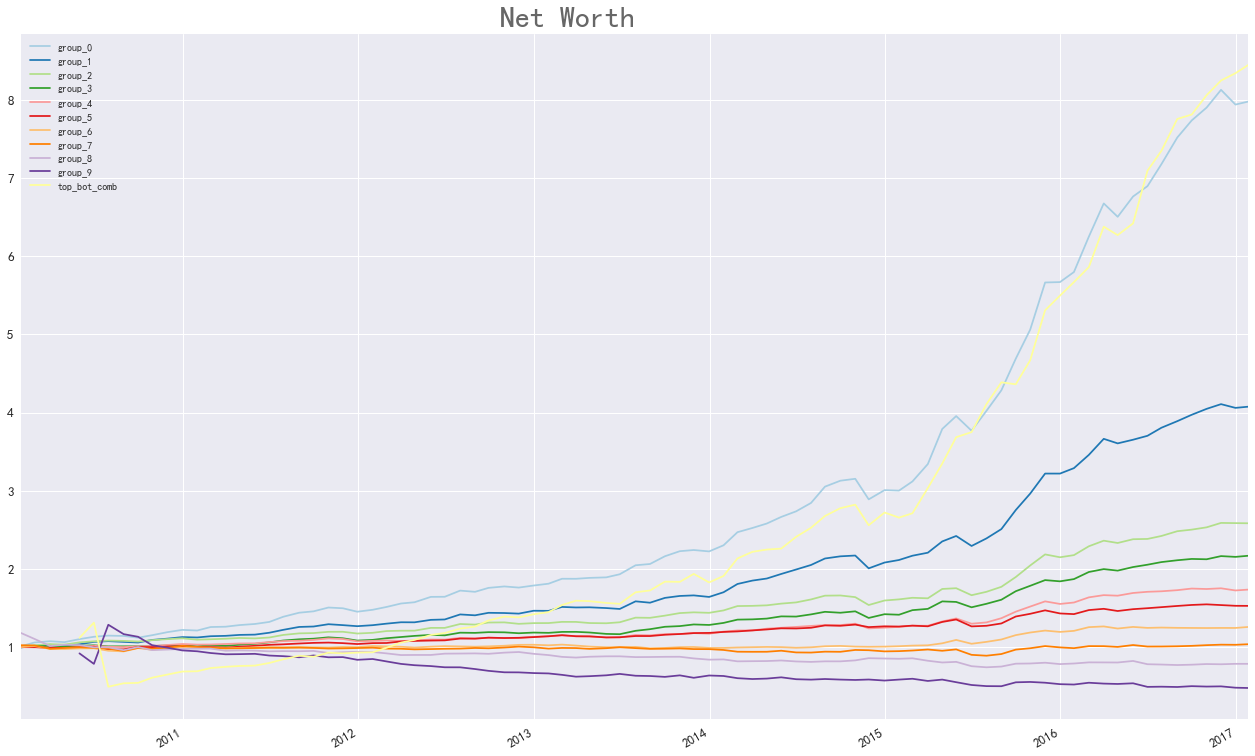

In [345]:
# Net worth plot 
netWorthDF = (ReturnDF.astype(float)+1).cumprod()
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
netWorthDF.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [346]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = netWorthDF.columns, data=range(len(netWorthDF.columns)))
monoDF = pd.DataFrame(index = netWorthDF.index, columns=['Spearman_Cor'], dtype = float)
for date in netWorthDF.index:
    monoDF.loc[date] = netWorthDF.loc[date].corr(referSeries,method='spearman')   

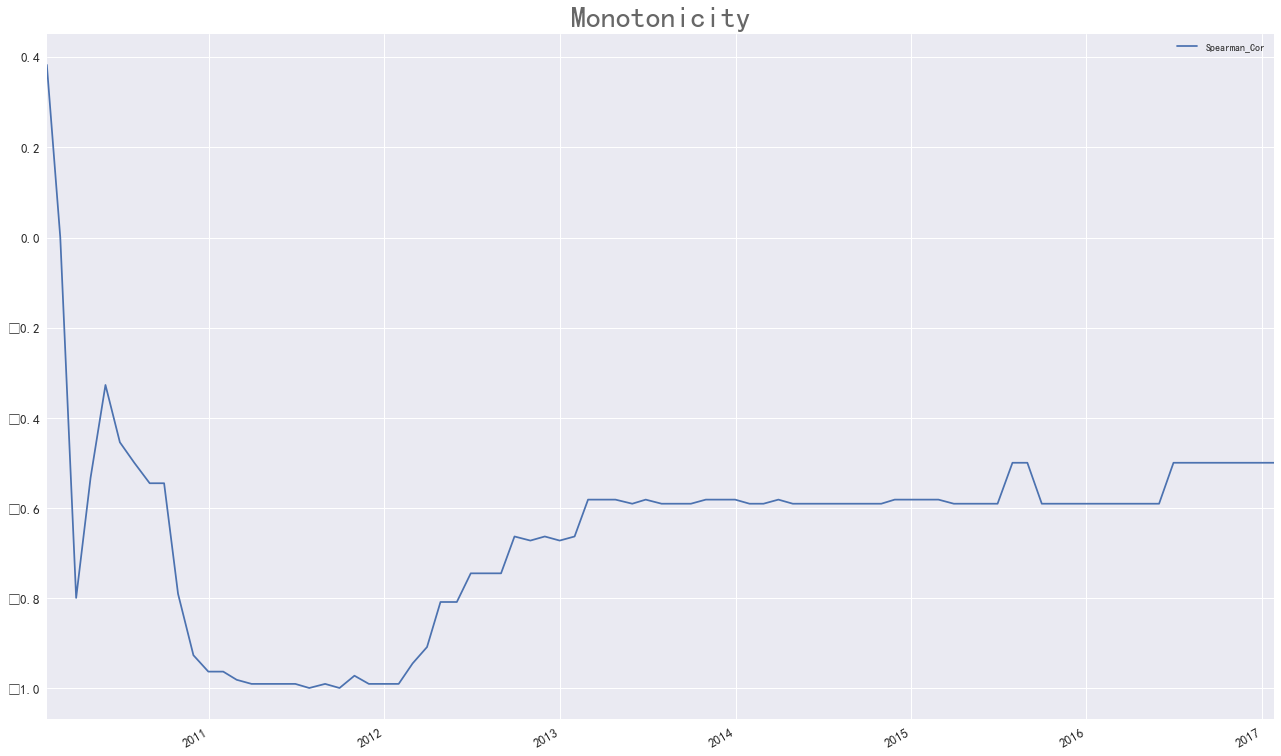

In [347]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [348]:
# shape Ratio
shapeRatio = ReturnDF.mean()/ReturnDF.std()
shapeRatio

group_0         0.766064
group_1         0.644878
group_2         0.513635
group_3         0.482192
group_4         0.392682
group_5         0.312120
group_6         0.182443
group_7         0.032584
group_8        -0.082824
group_9        -0.082860
top_bot_comb    0.377148
dtype: float64

In [349]:
# Max drawdown
maxdd = netWorthDF.copy()
maxdd.iloc[0] = 0
for date in netWorthDF.index[1:]:
    maxdd.loc[date] = 1-netWorthDF.loc[date]/netWorthDF.loc[:date].max()
maxddInfo = pd.concat([maxdd.max(),maxdd.idxmax()],axis=1)
maxddInfo.columns = ['Max_drawdown','Time']
maxddInfo

,Max_drawdown,Time
group_0,0.083552,2014-11-28
group_1,0.075604,2014-11-28
group_2,0.073631,2014-11-28
group_3,0.058153,2014-11-28
group_4,0.049469,2015-06-30
group_5,0.065288,2015-06-30
group_6,0.066960,2010-08-31
group_7,0.130950,2015-07-31
group_8,0.372636,2015-07-31
group_9,0.629653,2017-01-26


In [350]:
ReturnForPlot =ReturnDF.copy()

In [351]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [352]:
### the following part is to save return data of every factor into one Dataframe

In [353]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [354]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [355]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([ 3, 12,  4, 23, 14, 18, 15,  2, 16, 22])

In [356]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [357]:
#------------------------------ Following part is to group  stocks within industry --------------------------

In [358]:
wholeIndList = np.array(range(29))

wholeIndDict = getIndustryDict(endOfMonthList,wholeIndList,indusDF)

In [359]:
multindexList = [endOfMonthList,wholeIndList]
induReturnDF  = pd.DataFrame(data=None, columns=totalGroupDict.values()[0].keys(),\
                             index=pd.MultiIndex.from_product(multindexList,names=['time','industry']),dtype=float)

In [360]:
groupNumberThrottle = 10
for i,j in wholeIndDict.iteritems():
    print i
    factorIndice = factorData.loc[:i].tail()
    factorIndice = factorIndice[list(set(factorIndice.columns.tolist())- set(filterdict[date]))]  # Remove ST ,new and suspend stk
    for ind, stk in j.iteritems():
        intersection = list(set(factorIndice.columns.tolist()) & set(stk))
        if len(intersection) < groupNumberThrottle:
            induReturnDF.loc[i,ind] = 0
            continue
        else:
            stkgroup = ff.getStockGroup(factorIndice[intersection], groupNum=10, Mean_Num=1)
            for p,q in stkgroup.iteritems():
                try:
                    induReturnDF.loc[i,ind][p] = activeReturnData.loc[i][q].mean()
                except:
                    induReturnDF.loc[i,ind][p] = np.NaN

2016-12-30 00:00:00
2010-12-31 00:00:00
2015-05-29 00:00:00
2014-02-28 00:00:00
2012-03-30 00:00:00
2014-07-31 00:00:00
2012-11-30 00:00:00
2016-09-30 00:00:00
2013-07-31 00:00:00
2012-08-31 00:00:00
2014-11-28 00:00:00
2012-07-31 00:00:00
2012-04-27 00:00:00
2016-05-31 00:00:00
2014-05-30 00:00:00
2012-02-29 00:00:00
2013-09-30 00:00:00
2015-02-27 00:00:00
2015-07-31 00:00:00
2011-06-30 00:00:00
2011-05-31 00:00:00
2010-10-29 00:00:00
2010-11-30 00:00:00
2013-03-29 00:00:00
2010-07-30 00:00:00
2015-11-30 00:00:00
2012-05-31 00:00:00
2011-11-30 00:00:00
2011-07-29 00:00:00
2015-12-31 00:00:00
2011-02-28 00:00:00
2013-11-29 00:00:00
2016-03-31 00:00:00
2015-06-30 00:00:00
2011-04-29 00:00:00
2010-08-31 00:00:00
2013-01-31 00:00:00
2015-01-30 00:00:00
2011-12-30 00:00:00
2010-03-31 00:00:00
2011-03-31 00:00:00
2017-01-26 00:00:00
2011-09-30 00:00:00
2010-04-30 00:00:00
2016-10-31 00:00:00
2011-10-31 00:00:00
2012-06-29 00:00:00
2013-02-28 00:00:00
2014-09-30 00:00:00
2012-12-31 00:00:00


In [361]:
finalReturn = induReturnDF.mean(level = 'time')
finalReturn.sort_index(axis=1,inplace=True)

In [362]:
sortGroups1 = finalReturn .cumsum().iloc[-1].sort_values(ascending = False).index
top1, bot1 = sortGroups1[0], sortGroups1[-1]

# Add another column
finalReturn ['top_bot_comb'] = finalReturn[top1] - finalReturn[bot1]

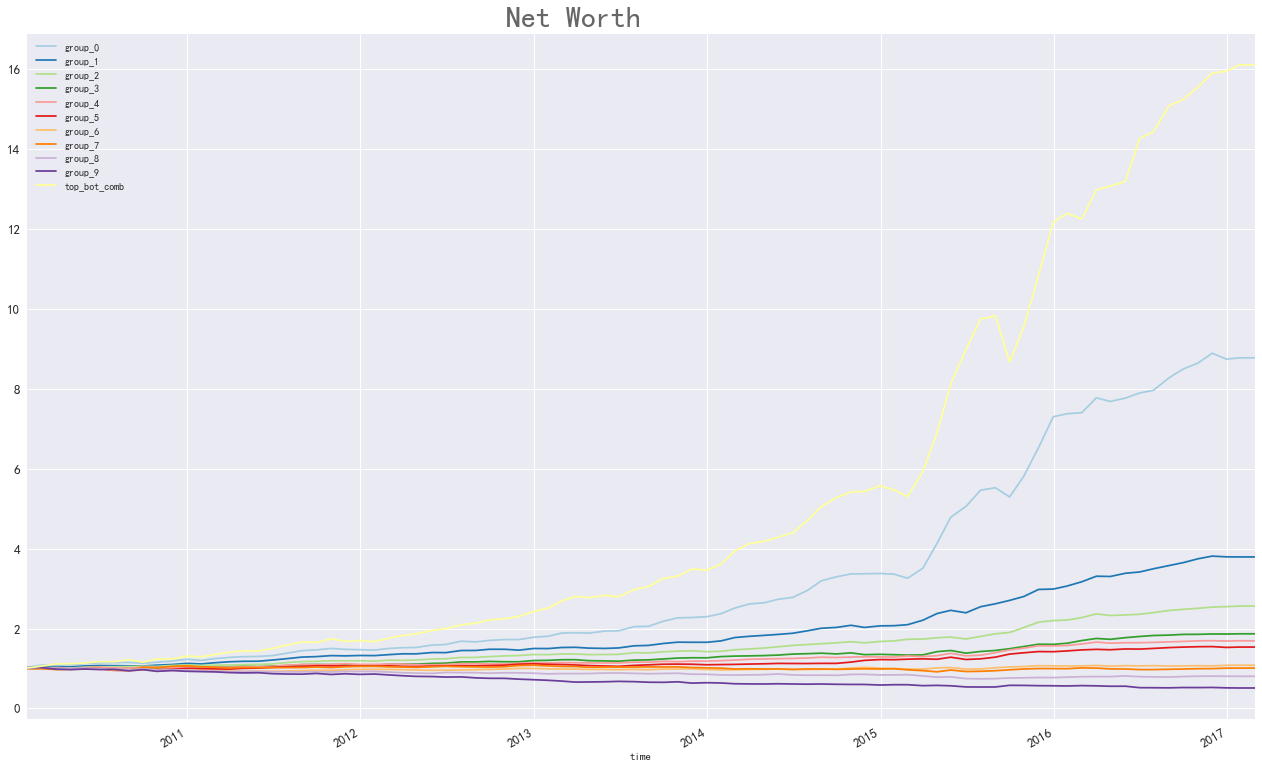

In [363]:
indNetWorth = (finalReturn+1).cumprod()
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
indNetWorth.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [364]:
shapeRatio1 = finalReturn.mean()/finalReturn.std()
shapeRatio1

group_0         0.709119
group_1         0.840722
group_2         0.730498
group_3         0.464626
group_4         0.438755
group_5         0.333073
group_6         0.079074
group_7         0.015238
group_8        -0.155927
group_9        -0.366783
top_bot_comb    0.767792
dtype: float64

In [365]:
finalReturn

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,top_bot_comb
time,,,,,,,,,,,
2010-01-29,0.031388,0.007327,0.000475,-0.012022,0.000781,-0.001673,-0.008228,-0.005389,-0.005105,0.019852,0.011536
2010-02-26,0.048176,0.033373,0.012204,0.017483,0.007219,0.008186,0.003528,0.003341,0.033282,0.004511,0.043665
2010-03-31,0.014185,0.005828,0.010963,0.004874,0.006837,0.003236,-0.002444,-0.025288,-0.017809,-0.041082,0.055267
2010-04-30,-0.006672,-0.008520,-0.016155,-0.014959,-0.014352,-0.027004,-0.010269,0.006817,-0.006362,-0.010256,0.003583
2010-05-31,0.032736,0.025964,0.026823,0.024058,0.020228,0.017306,0.011146,0.006949,0.006151,0.015354,0.017382
2010-06-30,0.015174,0.007846,0.007193,0.002596,0.009366,-0.002918,0.002064,0.000492,-0.017210,-0.014800,0.029974
2010-07-30,0.003846,-0.003069,0.000971,-0.025530,-0.014285,-0.042698,-0.034477,-0.016394,-0.003648,0.006345,-0.002500
2010-08-31,0.005004,-0.004544,0.005414,0.006491,-0.007336,-0.004420,-0.016626,-0.012798,-0.022173,-0.038810,0.043814
2010-09-30,-0.019540,-0.002733,0.007041,0.011116,0.027074,0.023590,0.025386,0.076343,0.027310,0.032233,-0.051773


In [366]:
# Max drawdown
maxdd1 = indNetWorth.copy()
maxdd1.iloc[0] = 0
for date in indNetWorth.index[1:]:
    maxdd1.loc[date] = 1-indNetWorth.loc[date]/indNetWorth.loc[:date].max()
maxddInfo1 = pd.concat([maxdd1.max(),maxdd1.idxmax()],axis=1)
maxddInfo1.columns = ['Max_drawdown','Time']
maxddInfo1

,Max_drawdown,Time
group_0,0.041676,2015-09-30
group_1,0.025915,2014-11-28
group_2,0.027539,2015-06-30
group_3,0.045919,2015-06-30
group_4,0.046288,2015-06-30
group_5,0.059371,2010-08-31
group_6,0.066275,2011-04-29
group_7,0.151443,2015-04-30
group_8,0.280124,2015-07-31
group_9,0.500600,2017-01-26


In [367]:
maxddInfo1-maxddInfo

,Max_drawdown,Time
group_0,-0.041875,306 days
group_1,-0.049689,0 days
group_2,-0.046092,214 days
group_3,-0.012234,214 days
group_4,-0.003181,0 days
group_5,-0.005918,-1764 days
group_6,-0.000685,241 days
group_7,0.020493,-92 days
group_8,-0.092511,0 days
group_9,-0.129054,0 days


In [368]:
#--------------------------------------  Section End   -------------------------------------

In [369]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [370]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [371]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [372]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [373]:
indusGroupDF

电力及公用事业        汽车        钢铁      交通运输      餐饮旅游      食品饮料  \
time       stats                                                                
2010-01-29 mean    0.026035  0.099518 -0.229109  0.028235  0.024004 -0.182115   
           median -0.061562  0.026104 -0.391411 -0.218605 -0.361675 -0.355319   
           std     0.722000  0.609041  0.780287  1.008045  1.285284  1.242288   
2010-02-26 mean   -0.154667 -0.040111 -0.051133  0.057850  0.259818  0.016554   
           median -0.259116 -0.187064 -0.294963 -0.201147 -0.241032 -0.238908   
           std     0.983878  0.644105  0.859431  0.905871  1.667903  1.054561   
2010-03-31 mean   -0.174778 -0.235225 -0.153466  0.015949 -0.203794 -0.059076   
           median -0.269399 -0.324625 -0.322253 -0.146876 -0.348455 -0.336894   
           std     0.546552  0.536289  0.628113  0.824637  0.588431  1.171217   
2010-04-30 mean    0.297048 -0.070036 -0.149177 -0.257723 -0.240496  0.057855   
           median  0.151487 -0.174385 -0.314783 -0.409614 -0.284483 -0.127306   
           std     1.128288  0.394425  0.955254  0.611656  0.566113  1.070711   
2010-05-31 mean    0.575870 -0.047678 -0.168147 -0.085513 -0.149543  0.032594   
           median  0.209293 -0.203987 -0.341772 -0.240756 -0.382235 -0.159844   
           std     1.316301  0.450420  0.696694  0.844793  0.679868  1.177778   
2010-06-30 mean    0.426063 -0.120781 -0.274790 -0.121188 -0.190289  0.300524   
           median  0.168123 -0.130499 -0.454693 -0.300917 -0.367174 -0.074622   
           std     1.770459  0.410818  0.559798  0.781747  0.649256  1.810963   
2010-07-30 mean    0.123926  0.272329 -0.124106  0.126926 -0.081839 -0.240252   
           median -0.009275 -0.107402 -0.294024 -0.131046 -0.323327 -0.418586   
           std     0.714636  1.087562  0.691132  0.978364  1.179820  0.865296   
2010-08-31 mean    0.324903  0.177697 -0.259984 -0.108642 -0.091047  0.106088   
           median  0.168857 -0.003654 -0.353734 -0.188400 -0.292587 -0.155156   
           std     0.853217  0.706468  0.557017  0.678135  0.792724  1.187246   
2010-09-30 mean    0.796413  0.177712 -0.256666 -0.317017 -0.147256  0.050468   
           median  0.564639  0.100493 -0.311153 -0.507847 -0.275093 -0.141531   
           std     1.425037  0.532741  0.481446  0.700609  0.650149  0.950323   
2010-10-29 mean    1.005751  0.022142 -0.150901 -0.288992 -0.370803 -0.047160   
           median  0.805641 -0.123242 -0.367966 -0.423687 -0.476831 -0.295545   
           std     1.182420  0.667521  1.052389  0.721527  0.596058  0.985187   
...                     ...       ...       ...       ...       ...       ...   
2016-05-31 mean    0.009550 -0.128464 -0.203705 -0.209752 -0.251590 -0.202227   
           median -0.134057 -0.192869 -0.273579 -0.297611 -0.328686 -0.247869   
           std     0.665973  0.288954  0.412897  0.484862  0.377273  0.357339   
2016-06-30 mean    0.088869 -0.031086 -0.351641 -0.243888 -0.275359 -0.259620   
           median  0.006655 -0.057083 -0.432899 -0.369679 -0.446919 -0.303792   
           std     0.658452  0.415271  0.415342  0.603390  0.657873  0.359754   
2016-07-29 mean    0.276936  0.175016 -0.274736 -0.146653 -0.231929 -0.197029   
           median  0.252961  0.098033 -0.303406 -0.290338 -0.343037 -0.244857   
           std     0.776708  0.530330  0.390246  0.649562  0.618687  0.395614   
2016-08-31 mean   -0.066118 -0.168712 -0.176067  0.110735 -0.015433 -0.122551   
           median -0.175730 -0.234596 -0.223886 -0.066803 -0.214429 -0.206016   
           std     0.459744  0.329510  0.624096  0.733812  0.690384  0.441646   
2016-09-30 mean   -0.074242 -0.167667  0.057756 -0.022702 -0.239389 -0.150385   
           median -0.145477 -0.222203 -0.097483 -0.165698 -0.351748 -0.218497   
           std     0.421779  0.352093  0.798388  0.583489  0.520576  0.351343   
2016-10-31 mean   -0.085413 -0.206731 -0.072483  0.024442 -0.236945 -0.212428   
           median -0.131413 -0.236760 -0.201371 -0.

In [374]:
capGroupsDF.head()

small       mid      huge
time       stats                               
2010-01-29 mean    4.588504  1.031317  0.215338
           median  3.353513 -0.197711 -0.130361
           std     4.709842  3.228191  1.579688
2010-02-26 mean    4.363350  0.947155  0.146910
           median  2.789702 -0.242806 -0.179528

In [375]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [376]:
newstack.head()

stats           mean                        median                      \
cap             huge       mid     small      huge       mid     small   
time                                                                     
2010-01-29  0.215338  1.031317  4.588504 -0.130361 -0.197711  3.353513   
2010-02-26  0.146910  0.947155  4.363350 -0.179528 -0.242806  2.789702   
2010-03-31  0.148738  0.717140  4.297797 -0.125490 -0.238771  2.456704   
2010-04-30  0.180082  0.644812  3.963571 -0.077725 -0.254752  1.574064   
2010-05-31  0.209242  0.641204  3.551088 -0.123512 -0.277710  1.033384   

stats            std                      
cap             huge       mid     small  
time                                      
2010-01-29  1.579688  3.228191  4.709842  
2010-02-26  1.375246  3.151615  4.746249  
2010-03-31  1.305656  2.935615  4.760582  
2010-04-30  1.369467  2.846373  4.773589  
2010-05-31  1.476651  2.830856  4.704011

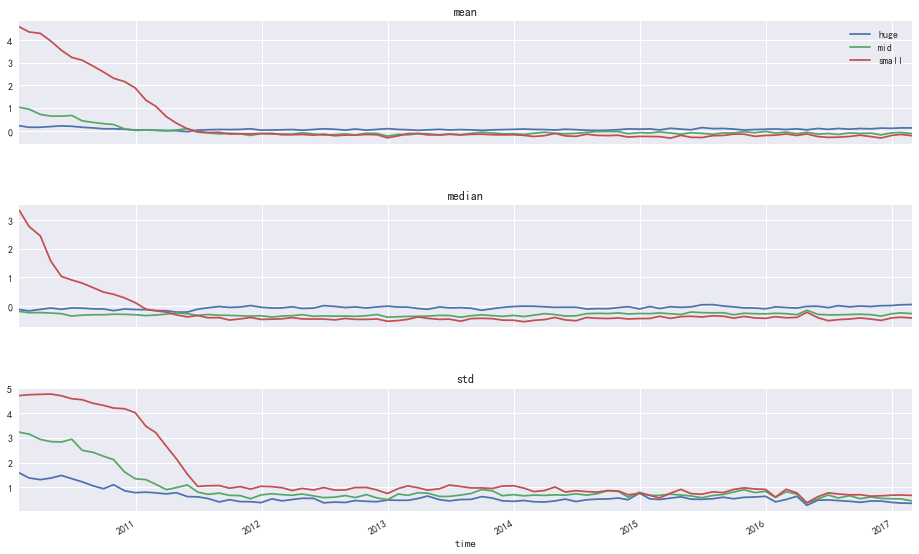

In [377]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [378]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

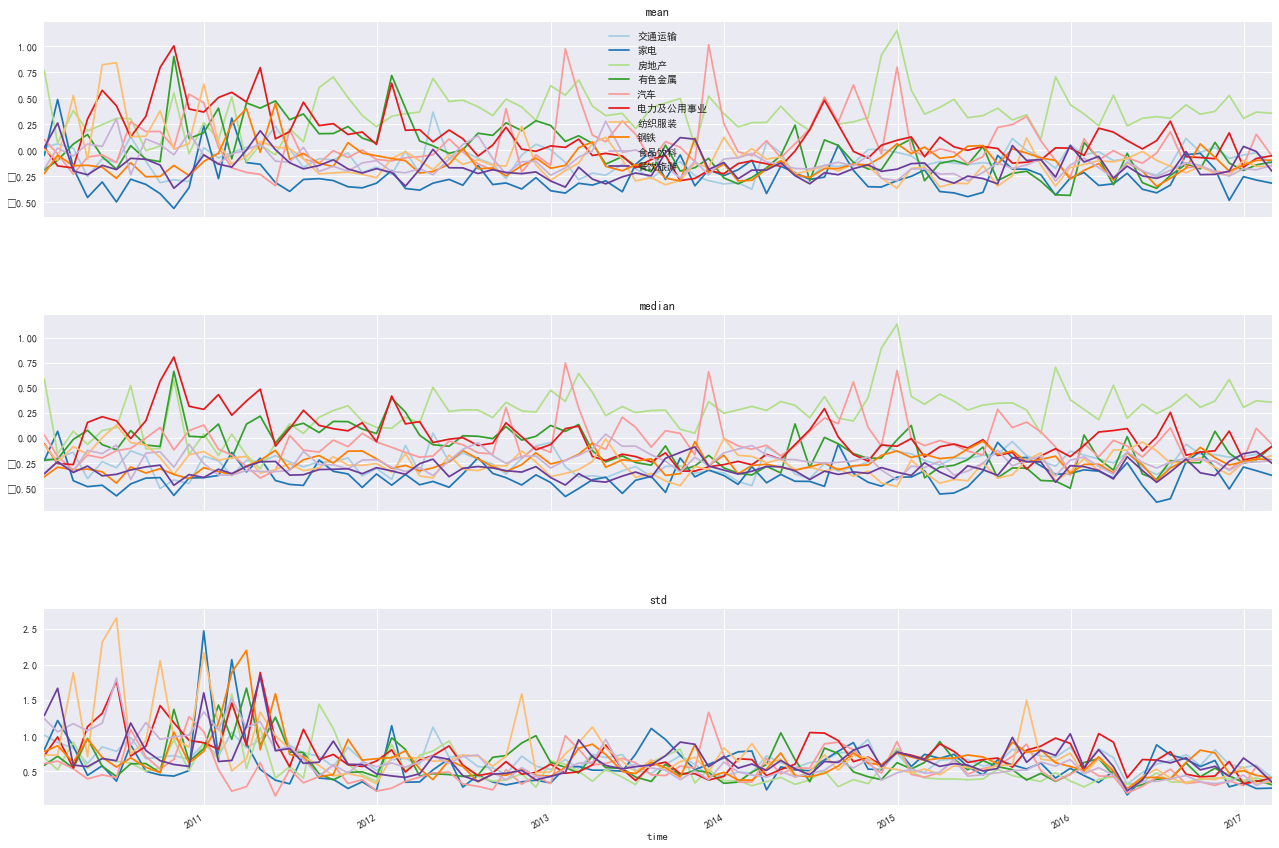

In [379]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [380]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [381]:
copydata.pivot_table(index='time',columns='stats').head()

small                           mid                      \
stats           mean    median       std      mean    median       std   
time                                                                     
2010-01-29  4.588504  3.353513  4.709842  1.031317 -0.197711  3.228191   
2010-02-26  4.363350  2.789702  4.746249  0.947155 -0.242806  3.151615   
2010-03-31  4.297797  2.456704  4.760582  0.717140 -0.238771  2.935615   
2010-04-30  3.963571  1.574064  4.773589  0.644812 -0.254752  2.846373   
2010-05-31  3.551088  1.033384  4.704011  0.641204 -0.277710  2.830856   

                huge                      
stats           mean    median       std  
time                                      
2010-01-29  0.215338 -0.130361  1.579688  
2010-02-26  0.146910 -0.179528  1.375246  
2010-03-31  0.148738 -0.125490  1.305656  
2010-04-30  0.180082 -0.077725  1.369467  
2010-05-31  0.209242 -0.123512  1.476651

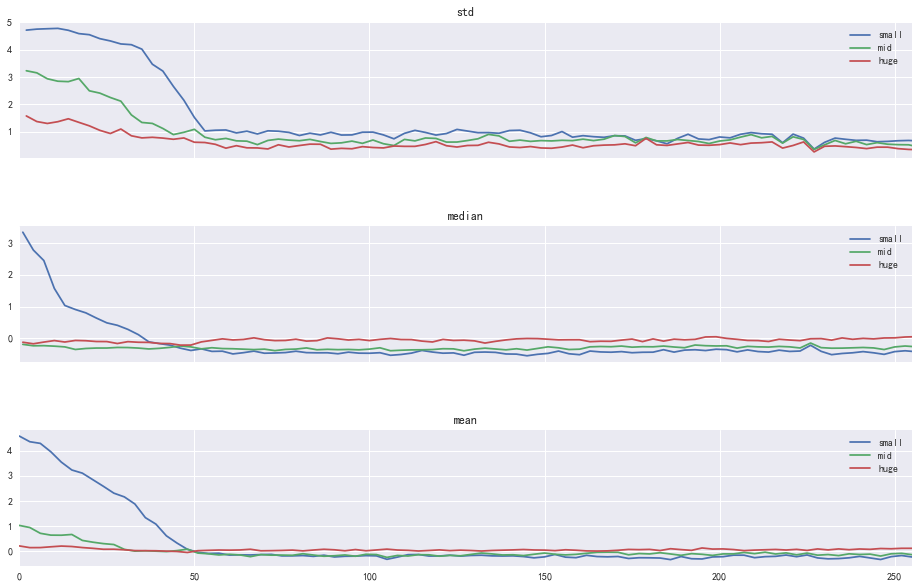

In [382]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)